### Pandas数据分析处理技能(下)
#### 目录
* 分组/Groupby
* 聚合/agg
* 数据拼接/concat
* 数据合并/merge/join
* 小项目/projects

#### 分组/Group by

举个例子，假设我们手头有一张公司每个员工的收入流水：

In [1]:
import pandas as pd
import numpy as np

In [2]:
salaries = pd.DataFrame({
    'Name':['BOSS','HanMeimei','HanMeimei','Han','BOSS','BOSS','HanMeimei','BOSS'],
    'Year':[2016,2016,2016,2016,2017,2017,2017,2017],
    'Salary':[40000,5000,4000,3000,38000,42000,6000,39000],
    'Bonus':[12000,3000,3500,1200,16000,18000,7000,21000]
})

In [3]:
salaries

,Bonus,Name,Salary,Year
0,12000,BOSS,40000,2016
1,3000,HanMeimei,5000,2016
2,3500,HanMeimei,4000,2016
3,1200,Han,3000,2016
4,16000,BOSS,38000,2017
5,18000,BOSS,42000,2017
6,7000,HanMeimei,6000,2017
7,21000,BOSS,39000,2017


group by实际上就是分组，通过某个字段不同，进行数据分组划分

In [4]:
group_by_name = salaries.groupby('Name')

In [5]:
type(group_by_name)

pandas.core.groupby.DataFrameGroupBy

In [10]:
# 取不同的分组
for item in group_by_name:
    print(item[0]) #分组对象名称
    print(item[1]) #分组数据
    print("\n")

BOSS
   Bonus  Name  Salary  Year
0  12000  BOSS   40000  2016
4  16000  BOSS   38000  2017
5  18000  BOSS   42000  2017
7  21000  BOSS   39000  2017


Han
   Bonus Name  Salary  Year
3   1200  Han    3000  2016


HanMeimei
   Bonus       Name  Salary  Year
1   3000  HanMeimei    5000  2016
2   3500  HanMeimei    4000  2016
6   7000  HanMeimei    6000  2017




groupby分组之后你可以去做一些统计聚会操作

#### 分组求和

In [11]:
group_by_name.sum() #求和

,Bonus,Salary,Year
Name,,,
BOSS,67000,159000,8067
Han,1200,3000,2016
HanMeimei,13500,15000,6049


In [12]:
group_by_name.mean() #求平均

,Bonus,Salary,Year
Name,,,
BOSS,16750.0,39750.0,2016.750000
Han,1200.0,3000.0,2016.000000
HanMeimei,4500.0,5000.0,2016.333333


#### 挑选一些列做统计运算

In [13]:
group_by_name[['Bonus','Salary']].sum() 

,Bonus,Salary
Name,,
BOSS,67000,159000
Han,1200,3000
HanMeimei,13500,15000


#### 按照Name排序

In [14]:
salaries.groupby('Name', sort=False).sum()

,Bonus,Salary,Year
Name,,,
BOSS,67000,159000,8067
HanMeimei,13500,15000,6049
Han,1200,3000,2016


In [15]:
# sum mean median

In [16]:
salaries.groupby('Name').median()

,Bonus,Salary,Year
Name,,,
BOSS,17000,39500,2017
Han,1200,3000,2016
HanMeimei,3500,5000,2016


#### 频次/出现了多少次

In [17]:
salaries.groupby('Name').size()

Name
BOSS         4
Han          1
HanMeimei    3
dtype: int64

In [18]:
salaries.info() #基本信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
Bonus     8 non-null int64
Name      8 non-null object
Salary    8 non-null int64
Year      8 non-null int64
dtypes: int64(3), object(1)
memory usage: 336.0+ bytes


In [19]:
salaries.describe() #统计信息

,Bonus,Salary,Year
count,8.000000,8.000000,8.000000
mean,10212.500000,22125.000000,2016.500000
std,7581.262145,18893.971072,0.534522
min,1200.000000,3000.000000,2016.000000
25%,3375.000000,4750.000000,2016.000000
50%,9500.000000,22000.000000,2016.500000
75%,16500.000000,39250.000000,2017.000000
max,21000.000000,42000.000000,2017.000000


#### 分组查看统计信息

In [20]:
salaries.groupby('Name').describe()

Bonus        Salary         Year
Name                                                    
BOSS      count      4.000000      4.000000     4.000000
          mean   16750.000000  39750.000000  2016.750000
          std     3774.917218   1707.825128     0.500000
          min    12000.000000  38000.000000  2016.000000
          25%    15000.000000  38750.000000  2016.750000
          50%    17000.000000  39500.000000  2017.000000
          75%    18750.000000  40500.000000  2017.000000
          max    21000.000000  42000.000000  2017.000000
Han       count      1.000000      1.000000     1.000000
          mean    1200.000000   3000.000000  2016.000000
          std             NaN           NaN          NaN
          min     1200.000000   3000.000000  2016.000000
          25%     1200.000000   3000.000000  2016.000000
          50%     1200.000000   3000.000000  2016.000000
          75%     1200.000000   3000.000000  2016.000000
          max     1200.000000   3000.000000  2016.000000
HanMeimei count      3.000000      3.000000     3.000000
          mean    4500.000000   5000.000000  2016.333333
          std     2179.449472   1000.000000     0.577350
          min     3000.000000   4000.000000  2016.000000
          25%     3250.000000   4500.000000  2016.000000
          50%     3500.000000   5000.000000  2016.000000
          75%     5250.000000   5500.000000  2016.500000
          max     7000.000000   6000.000000  2017.000000

In [23]:
salaries.groupby('Name')[['Bonus', 'Salary']].agg(['sum', 'mean', 'std', 'median'])

Bonus                             Salary                           
             sum   mean          std median     sum   mean          std median
Name                                                                          
BOSS       67000  16750  3774.917218  17000  159000  39750  1707.825128  39500
Han         1200   1200          NaN   1200    3000   3000          NaN   3000
HanMeimei  13500   4500  2179.449472   3500   15000   5000  1000.000000   5000

In [26]:
salaries.groupby('Name')[['Bonus','Salary']].agg([np.sum, np.mean, np.std, np.median])

Bonus                             Salary                           
             sum   mean          std median     sum   mean          std median
Name                                                                          
BOSS       67000  16750  3774.917218  17000  159000  39750  1707.825128  39500
Han         1200   1200          NaN   1200    3000   3000          NaN   3000
HanMeimei  13500   4500  2179.449472   3500   15000   5000  1000.000000   5000

In [29]:
salaries.groupby('Name')[['Bonus']].agg([np.sum, np.mean, np.std, np.median])

Bonus                           
             sum   mean          std median
Name                                       
BOSS       67000  16750  3774.917218  17000
Han         1200   1200          NaN   1200
HanMeimei  13500   4500  2179.449472   3500

In [30]:
type(salaries['Bonus'])

pandas.core.series.Series

In [31]:
type(salaries[['Bonus']])

pandas.core.frame.DataFrame

#### 变换/transform

In [34]:
nvda = pd.read_csv('data/NVDA.csv', index_col=0, parse_dates=['Date'])

In [35]:
nvda.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-22,1.750000,1.953125,1.552083,1.640625,1.523430,67867200
1999-01-25,1.770833,1.833333,1.640625,1.812500,1.683028,12762000
1999-01-26,1.833333,1.869792,1.645833,1.671875,1.552448,8580000
1999-01-27,1.677083,1.718750,1.583333,1.666667,1.547611,6109200
1999-01-28,1.666667,1.677083,1.651042,1.661458,1.542776,5688000


In [36]:
nvda.loc[:,'year'] = nvda.index.year

In [37]:
nvda.head()

,Open,High,Low,Close,Adj Close,Volume,year
Date,,,,,,,
1999-01-22,1.750000,1.953125,1.552083,1.640625,1.523430,67867200,1999
1999-01-25,1.770833,1.833333,1.640625,1.812500,1.683028,12762000,1999
1999-01-26,1.833333,1.869792,1.645833,1.671875,1.552448,8580000,1999
1999-01-27,1.677083,1.718750,1.583333,1.666667,1.547611,6109200,1999
1999-01-28,1.666667,1.677083,1.651042,1.661458,1.542776,5688000,1999


#### 某一列有多少不同的取值 => unique

In [38]:
nvda['year'].unique()

array([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])

#### 某一列有多少不同的取值，它们分别出现了多少次 => value_counts()

In [40]:
nvda['year'].value_counts()

2008    253
2015    252
2011    252
2004    252
2016    252
2005    252
2009    252
2013    252
2000    252
2002    252
2010    252
2014    252
2003    252
2006    251
2007    251
2012    250
2001    248
1999    239
2017    138
Name: year, dtype: int64

In [47]:
tmp = nvda['year'].value_counts().to_frame()
tmp = tmp.reset_index()
tmp.columns = ['year','count']

In [49]:
tmp.head()

,year,count
0,2008,253
1,2015,252
2,2011,252
3,2004,252
4,2016,252


In [51]:
tmp.sort_values(by='year').head()

,year,count
17,1999,239
8,2000,252
16,2001,248
9,2002,252
12,2003,252


In [52]:
nvda.head()

,Open,High,Low,Close,Adj Close,Volume,year
Date,,,,,,,
1999-01-22,1.750000,1.953125,1.552083,1.640625,1.523430,67867200,1999
1999-01-25,1.770833,1.833333,1.640625,1.812500,1.683028,12762000,1999
1999-01-26,1.833333,1.869792,1.645833,1.671875,1.552448,8580000,1999
1999-01-27,1.677083,1.718750,1.583333,1.666667,1.547611,6109200,1999
1999-01-28,1.666667,1.677083,1.651042,1.661458,1.542776,5688000,1999


In [53]:
nvda.groupby('year').agg(['mean', 'std'])

Open                   High                    Low             \
            mean        std        mean        std        mean        std   
year                                                                        
1999    1.950782   0.588882    2.007317   0.614302    1.883559   0.571658   
2000    8.781084   2.999908    9.222697   3.114186    8.360522   2.904761   
2001   13.091254   3.839777   13.600750   3.829838   12.680548   3.830944   
2002    9.690344   6.561287    9.955093   6.664226    9.344391   6.375212   
2003    5.902434   1.461862    6.042659   1.491260    5.764960   1.423422   
2004    6.484735   1.467445    6.608810   1.482036    6.353558   1.444797   
2005    9.512381   1.580061    9.659656   1.591274    9.353175   1.571138   
2006   18.057902   3.675092   18.425126   3.718616   17.720279   3.657584   
2007   27.762045   6.111437   28.251673   6.225662   27.206056   5.902620   
2008   16.004308   6.862760   16.426245   6.964528   15.521462   6.696381   
2009   11.825119   2.638097   12.114762   2.612499   11.565952   2.640537   
2010   13.576349   2.888884   13.802659   2.904905   13.318532   2.843065   
2011   16.912540   3.404884   17.267540   3.490368   16.512143   3.305507   
2012   13.526200   1.176957   13.717400   1.191775   13.319800   1.165419   
2013   14.173571   1.251508   14.329802   1.253287   14.035278   1.253372   
2014   18.543056   1.293283   18.745476   1.283480   18.348214   1.276038   
2015   23.680595   4.106327   23.979524   4.152229   23.411071   4.079351   
2016   53.630833  21.714540   54.415397  22.182621   52.895119  21.263517   
2017  120.481305  22.027821  122.300725  22.510244  118.402754  21.281863   

           Close              Adj Close               Volume                
            mean        std        mean        std      mean           std  
year                                                                        
1999    1.947230   0.601041    1.808134   0.558107   6433220  8.142949e+06  
2000    8.778826   3.013104    8.151729   2.797869  11041816  7.985374e+06  
2001   13.181552   3.833637   12.239956   3.559789  27823873  1.384318e+07  
2002    9.614749   6.519053    8.927940   6.053379  31686546  1.558742e+07  
2003    5.900344   1.459852    5.478865   1.355570  24302202  1.899657e+07  
2004    6.465913   1.456575    6.004034   1.352528  17063313  1.191968e+07  
2005    9.513823   1.589762    8.834223   1.476201  15428251  9.623837e+06  
2006   18.095963   3.700960   16.803316   3.436590  15344458  6.616879e+06  
2007   27.724542   6.087681   25.744098   5.652820  15145619  5.818216e+06  
2008   15.945613   6.811527   14.806572   6.324960  20227213  8.552974e+06  
2009   11.850873   2.631664   11.004331   2.443677  19198209  8.291987e+06  
2010   13.563175   2.884261   12.594318   2.678230  18532949  8.434693e+06  
2011   16.887540   3.404032   15.681214   3.160872  22893515  1.270114e+07  
2012   13.507880   1.185139   12.551166   1.091736  12077568  5.050116e+06  
2013   14.189127   1.250883   13.412278   1.260152   8843985  4.202323e+06  
2014   18.547064   1.284932   17.875053   1.312833   7098902  3.140560e+06  
2015   23.718254   4.128879   23.262283   4.154678   7756520  3.933075e+06  
2016   53.761190  21.803927   53.475737  21.824367  11070624  7.547056e+06  
2017  120.547971  21.991898  120.436863  22.056290  19077419  1.073342e+07

In [55]:
def my_transform(x):
    return (x-x.mean())/x.std()

In [56]:
tmp_arr = np.array(range(10))

In [57]:
tmp_arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [58]:
my_transform(tmp_arr)

array([-1.5666989 , -1.21854359, -0.87038828, -0.52223297, -0.17407766,
        0.17407766,  0.52223297,  0.87038828,  1.21854359,  1.5666989 ])

In [63]:
tranformed = nvda.groupby('year').transform(my_transform)

In [64]:
tranformed.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-22,-0.340955,-0.088217,-0.579850,-0.510124,-0.510124,7.544438
1999-01-25,-0.305578,-0.283222,-0.424964,-0.224161,-0.224161,0.777210
1999-01-26,-0.199444,-0.223871,-0.415854,-0.458130,-0.458131,0.263637
1999-01-27,-0.464778,-0.469747,-0.525185,-0.466795,-0.466798,-0.039791
1999-01-28,-0.482465,-0.537575,-0.406741,-0.475462,-0.475461,-0.091517


In [65]:
%matplotlib inline

In [66]:
compare_df = pd.DataFrame({'Origin':nvda['Adj Close'], 'Transformed':tranformed['Adj Close']})

In [67]:
compare_df.head()

,Origin,Transformed
Date,,
1999-01-22,1.523430,-0.510124
1999-01-25,1.683028,-0.224161
1999-01-26,1.552448,-0.458131
1999-01-27,1.547611,-0.466798
1999-01-28,1.542776,-0.475461


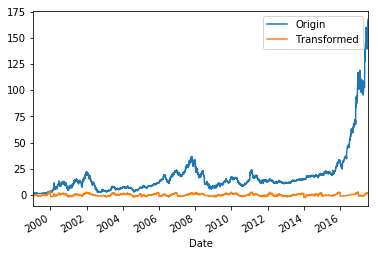

In [68]:
compare_df.plot()

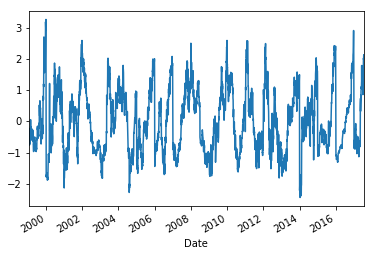

In [70]:
compare_df['Transformed'].plot()

#### 变换函数apply

In [71]:
salaries

,Bonus,Name,Salary,Year
0,12000,BOSS,40000,2016
1,3000,HanMeimei,5000,2016
2,3500,HanMeimei,4000,2016
3,1200,Han,3000,2016
4,16000,BOSS,38000,2017
5,18000,BOSS,42000,2017
6,7000,HanMeimei,6000,2017
7,21000,BOSS,39000,2017


In [72]:
salaries.loc[:,'tmp_col'] = (salaries['Salary']*2-1500)/0.8

In [73]:
salaries

,Bonus,Name,Salary,Year,tmp_col
0,12000,BOSS,40000,2016,98125.0
1,3000,HanMeimei,5000,2016,10625.0
2,3500,HanMeimei,4000,2016,8125.0
3,1200,Han,3000,2016,5625.0
4,16000,BOSS,38000,2017,93125.0
5,18000,BOSS,42000,2017,103125.0
6,7000,HanMeimei,6000,2017,13125.0
7,21000,BOSS,39000,2017,95625.0


In [74]:
def trans(x):
    return (x*2-1500)/0.8

In [75]:
salaries.loc[:,'tmp_col2'] = salaries['Salary'].apply(trans)

In [76]:
salaries

,Bonus,Name,Salary,Year,tmp_col,tmp_col2
0,12000,BOSS,40000,2016,98125.0,98125.0
1,3000,HanMeimei,5000,2016,10625.0,10625.0
2,3500,HanMeimei,4000,2016,8125.0,8125.0
3,1200,Han,3000,2016,5625.0,5625.0
4,16000,BOSS,38000,2017,93125.0,93125.0
5,18000,BOSS,42000,2017,103125.0,103125.0
6,7000,HanMeimei,6000,2017,13125.0,13125.0
7,21000,BOSS,39000,2017,95625.0,95625.0


In [77]:
def trans2(x):
    if x=='Han':
        return 'HanXiaoyang'
    else:
        return x

In [78]:
salaries.loc[:,'full_name'] = salaries['Name'].apply(trans2)

In [79]:
salaries

,Bonus,Name,Salary,Year,tmp_col,tmp_col2,full_name
0,12000,BOSS,40000,2016,98125.0,98125.0,BOSS
1,3000,HanMeimei,5000,2016,10625.0,10625.0,HanMeimei
2,3500,HanMeimei,4000,2016,8125.0,8125.0,HanMeimei
3,1200,Han,3000,2016,5625.0,5625.0,HanXiaoyang
4,16000,BOSS,38000,2017,93125.0,93125.0,BOSS
5,18000,BOSS,42000,2017,103125.0,103125.0,BOSS
6,7000,HanMeimei,6000,2017,13125.0,13125.0,HanMeimei
7,21000,BOSS,39000,2017,95625.0,95625.0,BOSS


In [81]:
help(pd.Series.apply)

Help on function apply in module pandas.core.series:

apply(self, func, convert_dtype=True, args=(), **kwds)
    Invoke function on values of Series. Can be ufunc (a NumPy function
    that applies to the entire Series) or a Python function that only works
    on single values
    
    Parameters
    ----------
    func : function
    convert_dtype : boolean, default True
        Try to find better dtype for elementwise function results. If
        False, leave as dtype=object
    args : tuple
        Positional arguments to pass to function in addition to the value
    Additional keyword arguments will be passed as keywords to the function
    
    Returns
    -------
    y : Series or DataFrame if func returns a Series
    
    See also
    --------
    Series.map: For element-wise operations
    
    Examples
    --------
    
    Create a series with typical summer temperatures for each city.
    
    >>> import pandas as pd
    >>> import numpy as np
    >>> series = pd.Series([20

In [85]:
salaries

,Bonus,Name,Salary,Year,tmp_col,tmp_col2,full_name
0,12000,BOSS,40000,2016,98125.0,98125.0,BOSS
1,3000,HanMeimei,5000,2016,10625.0,10625.0,HanMeimei
2,3500,HanMeimei,4000,2016,8125.0,8125.0,HanMeimei
3,1200,Han,3000,2016,5625.0,5625.0,HanXiaoyang
4,16000,BOSS,38000,2017,93125.0,93125.0,BOSS
5,18000,BOSS,42000,2017,103125.0,103125.0,BOSS
6,7000,HanMeimei,6000,2017,13125.0,13125.0,HanMeimei
7,21000,BOSS,39000,2017,95625.0,95625.0,BOSS


In [88]:
gender = 'male'
sex = '男' if gender=='male' else '女'

In [89]:
sex

'男'

#### lambda匿名函数

In [ ]:
salaries.loc[:,'new_name'] = salaries['Name'].apply(lambda x: 'HanXiaoyang' if x=='han' else x)

#### 对几列做操作

In [90]:
# 如果是boss，返回工资+奖金，其他人返回工资
def my_fun(name, salary, bonus):
    if name=='BOSS':
        return salary+bonus
    else:
        return salary

In [96]:
salaries.loc[:,'my_s_result'] = list(map(lambda x,y,z:my_fun(x,y,z), \
                                         salaries['Name'],\
                                         salaries['Salary'],\
                                         salaries['Bonus']))

#### 总结

* groupby取分组内容
* groupby分组之后做统计计算agg([np.sum,'median','std'])
* groupby之后describe、transform
* apply对列做变换(定义一个函数)
* 附加：对多列做变换，map(lambda x,y,z,a:my_fun(x,y,z,a), df['x'], df['y']...)

### 数据的拼接与合并

* concat
* merge
* join

In [101]:
df1 = pd.DataFrame({'apts':[55000,60000], 'cars':[200000,300000]}, index=['Shanghai','Beijing'])

In [102]:
df1

,apts,cars
Shanghai,55000,200000
Beijing,60000,300000


In [103]:
df2 = pd.DataFrame({'apts':[35000, 45000], 'cars':[150000, 180000]}, index=['Hangzhou','Guangzhou'])

In [104]:
df2

,apts,cars
Hangzhou,35000,150000
Guangzhou,45000,180000


In [105]:
df3 = pd.DataFrame({'apts':[30000, 10000], 'cars':[120000, 100000]}, index=['Nanjing','Chongqing'])

In [106]:
df3

,apts,cars
Nanjing,30000,120000
Chongqing,10000,100000


In [107]:
# concat
result = pd.concat([df1,df2,df3])

In [108]:
result

,apts,cars
Shanghai,55000,200000
Beijing,60000,300000
Hangzhou,35000,150000
Guangzhou,45000,180000
Nanjing,30000,120000
Chongqing,10000,100000


In [110]:
#行对齐去拼接
pd.concat([df1,df1,df1], axis=1)

,apts,cars,apts,cars,apts,cars
Shanghai,55000,200000,55000,200000,55000,200000
Beijing,60000,300000,60000,300000,60000,300000


In [111]:
#列对齐拼接
pd.concat([df1,df1,df1], axis=0)

,apts,cars
Shanghai,55000,200000
Beijing,60000,300000
Shanghai,55000,200000
Beijing,60000,300000
Shanghai,55000,200000
Beijing,60000,300000


In [112]:
#append
df1.append(df1)

,apts,cars
Shanghai,55000,200000
Beijing,60000,300000
Shanghai,55000,200000
Beijing,60000,300000


In [113]:
result

,apts,cars
Shanghai,55000,200000
Beijing,60000,300000
Hangzhou,35000,150000
Guangzhou,45000,180000
Nanjing,30000,120000
Chongqing,10000,100000


#### 合并/merge

In [114]:
def my_trans_apts(x):
    if x<45000:
        return 45000
    else:
        return 60000

In [115]:
result.loc[:,'new_apts'] = result['apts'].apply(my_trans_apts)

In [116]:
result

,apts,cars,new_apts
Shanghai,55000,200000,60000
Beijing,60000,300000,60000
Hangzhou,35000,150000,45000
Guangzhou,45000,180000,60000
Nanjing,30000,120000,45000
Chongqing,10000,100000,45000


In [119]:
new_df = pd.DataFrame({'new_apts':[60000,45000], 'bonus':[100000, 50000]})

In [120]:
new_df

,bonus,new_apts
0,100000,60000
1,50000,45000


In [121]:
pd.merge(result, new_df, on=['new_apts'], how='inner')

,apts,cars,new_apts,bonus
0,55000,200000,60000,100000
1,60000,300000,60000,100000
2,45000,180000,60000,100000
3,35000,150000,45000,50000
4,30000,120000,45000,50000
5,10000,100000,45000,50000


In [122]:
new_df2 = pd.DataFrame({'new_apts':[65000,45000], 'bonus':[100000, 50000]})

In [123]:
new_df2

,bonus,new_apts
0,100000,65000
1,50000,45000


In [124]:
result

,apts,cars,new_apts
Shanghai,55000,200000,60000
Beijing,60000,300000,60000
Hangzhou,35000,150000,45000
Guangzhou,45000,180000,60000
Nanjing,30000,120000,45000
Chongqing,10000,100000,45000


In [125]:
pd.merge(result, new_df2, on=['new_apts'], how='left')

,apts,cars,new_apts,bonus
0,55000,200000,60000,NaN
1,60000,300000,60000,NaN
2,35000,150000,45000,50000.0
3,45000,180000,60000,NaN
4,30000,120000,45000,50000.0
5,10000,100000,45000,50000.0


In [126]:
pd.merge(result, new_df2, on=['new_apts'], how='right')

,apts,cars,new_apts,bonus
0,35000.0,150000.0,45000,50000
1,30000.0,120000.0,45000,50000
2,10000.0,100000.0,45000,50000
3,NaN,NaN,65000,100000


In [130]:
df1

,apts,cars
Shanghai,55000,200000
Beijing,60000,300000


In [131]:
df2

,apts,cars
Hangzhou,35000,150000
Guangzhou,45000,180000


In [132]:
df3

,apts,cars
Nanjing,30000,120000
Chongqing,10000,100000


In [133]:
df4 = pd.DataFrame({'salaries':[10000,30000,30000,20000,15000]}, index=['Suzhou', 'Beijing','Shanghai','Guangzhou','Tianjin'])

In [134]:
df4

,salaries
Suzhou,10000
Beijing,30000
Shanghai,30000
Guangzhou,20000
Tianjin,15000


#### join基于index去合并数据的函数

In [136]:
df1.join(df4)

,apts,cars,salaries
Shanghai,55000,200000,30000
Beijing,60000,300000,30000


In [137]:
df2.join(df4)

,apts,cars,salaries
Hangzhou,35000,150000,NaN
Guangzhou,45000,180000,20000.0


In [135]:
help(pd.DataFrame.join)

Help on function join in module pandas.core.frame:

join(self, other, on=None, how='left', lsuffix='', rsuffix='', sort=False)
    Join columns with other DataFrame either on index or on a key
    column. Efficiently Join multiple DataFrame objects by index at once by
    passing a list.
    
    Parameters
    ----------
    other : DataFrame, Series with name field set, or list of DataFrame
        Index should be similar to one of the columns in this one. If a
        Series is passed, its name attribute must be set, and that will be
        used as the column name in the resulting joined DataFrame
    on : column name, tuple/list of column names, or array-like
        Column(s) in the caller to join on the index in other,
        otherwise joins index-on-index. If multiples
        columns given, the passed DataFrame must have a MultiIndex. Can
        pass an array as the join key if not already contained in the
        calling DataFrame. Like an Excel VLOOKUP operation
    how : 

#### 总结

* concat：拼接，axies指定拼接的维度
* merge：基于某个列去做关联
* join：基于index去做数据合并

### 自行车租赁分析

In [144]:
bikes = pd.read_csv('data/bikes.csv', sep=';', encoding='latin1', \
                    parse_dates=['Date'], index_col='Date')

In [145]:
bikes.head()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-02-01,83,NaN,1,68,153,53,6,43,NaN
2012-03-01,135,NaN,2,104,248,89,3,58,NaN
2012-04-01,144,NaN,1,116,318,111,8,61,NaN
2012-05-01,197,NaN,2,124,330,97,13,95,NaN


In [146]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 310 entries, 2012-01-01 to 2012-05-11
Data columns (total 9 columns):
Berri 1                                310 non-null int64
Brébeuf (données non disponibles)      0 non-null float64
Côte-Sainte-Catherine                  310 non-null int64
Maisonneuve 1                          310 non-null int64
Maisonneuve 2                          310 non-null int64
du Parc                                310 non-null int64
Pierre-Dupuy                           310 non-null int64
Rachel1                                310 non-null int64
St-Urbain (données non disponibles)    0 non-null float64
dtypes: float64(2), int64(7)
memory usage: 24.2 KB


In [147]:
#dropna去空，默认是去除有缺失值的行
bikes.dropna()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,


In [149]:
bikes.dropna(axis=1, how='all').head()

,Berri 1,Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1
Date,,,,,,,
2012-01-01,35,0,38,51,26,10,16
2012-02-01,83,1,68,153,53,6,43
2012-03-01,135,2,104,248,89,3,58
2012-04-01,144,1,116,318,111,8,61
2012-05-01,197,2,124,330,97,13,95


In [150]:
bikes.shape

(310, 9)

In [151]:
bikes.dropna(axis=1, how='all', inplace=True)

In [152]:
bikes.shape

(310, 7)

In [153]:
bikes.loc[:,'weekday'] = bikes.index.weekday

In [154]:
bikes.head()

,Berri 1,Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,weekday
Date,,,,,,,,
2012-01-01,35,0,38,51,26,10,16,6
2012-02-01,83,1,68,153,53,6,43,2
2012-03-01,135,2,104,248,89,3,58,3
2012-04-01,144,1,116,318,111,8,61,6
2012-05-01,197,2,124,330,97,13,95,1


In [155]:
weekday_counts = bikes.groupby('weekday').agg(sum)

In [156]:
weekday_counts.head()

,Berri 1,Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1
weekday,,,,,,,
0,132446,57940,90828,163042,89338,41524,126215
1,119895,52113,80865,145389,79585,35967,114622
2,146785,64189,99674,177105,96340,45103,130796
3,147630,61855,102801,177285,93386,46600,135268
4,150183,61432,102317,181651,95731,47272,143115


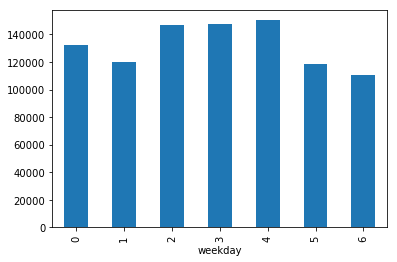

In [158]:
%matplotlib inline
weekday_counts['Berri 1'].plot(kind='bar')